In [25]:
#pip install tensorflow

In [77]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import datasets
from sklearn.datasets import load_iris
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.compat.v1 import train



In [78]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
iris_data = pd.read_csv(url,names=columns)
print(iris_data.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [79]:
print("verinin boyutları: \n", iris_data.shape)

verinin boyutları: 
 (150, 5)


In [ ]:
#data_frop sütun bırakma, hangi sütunu alacağımı belirleriz. 

In [108]:
#sınıf özniteliğinin ayrılması 
X = iris_data.drop("Class", axis=1)
y = iris_data["Class"]

In [81]:
etiketleme = LabelEncoder()

y = etiketleme.fit_transform(y)
y = to_categorical(y)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,) 

In [93]:
model = Sequential([
    Dense(32, input_shape= (4,), activation='relu'),
    Dense(64, activation='relu'), 
    Dense(3, activation='softmax')
])

In [94]:
#Bu kod, Keras kütüphanesini kullanarak bir sinir ağı modeli oluşturur. Aşağıdaki şekildeki katmanları içerir:

#Sequential: Bu, modelin katmanlarını sıralı olarak tanımlamak için kullanılan bir Keras modeli türüdür. 
#Bu model, katmanları sırayla eklediğinizde ardışık bir sinir ağı oluşturur.

#Dense: Bu, tam bağlantılı (fully connected) bir katmanı tanımlamak için kullanılır. 
#Tüm giriş birimleri, tüm çıkış birimleriyle bağlantılıdır.

#input_shape: İlk katmanın giriş şeklini tanımlar. Bu durumda, 5 özellikten oluşan bir giriş şekli belirtilmiştir.

#activation: Katmanın aktivasyon işlevini belirler. 
#'relu' aktivasyonu, negatif girişler için sıfır çıktı üretirken, pozitif girişleri doğrudan ileterek 
#sinir ağının öğrenme kapasitesini artırır. 'softmax' aktivasyonu, çıktıları bir olasılık dağılımına dönüştürür, 
#böylece çıkışları toplamı 1 olur ve sınıflandırma problemleri için uygun hale gelir.

#Bu kod örneğinde, modelin ilk katmanı 32 nörona sahip bir gizli katman olup, giriş şekli 5'tir ve 
#'relu' aktivasyon fonksiyonu kullanır. İkinci katman 64 nörona sahiptir ve yine 'relu' aktivasyon fonksiyonu kullanır. 
#Son katman, çıkış şekli 3'tür ve 'softmax' aktivasyon fonksiyonu kullanır. 
#Bu genellikle çok sınıflı sınıflandırma problemleri için tercih edilen bir yapıdır, 
#çünkü softmax çıkışları sınıflar arası olasılıkları temsil eder.

In [95]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                160       
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2467 (9.64 KB)
Trainable params: 2467 (9.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
#Bu çıktı, bir sinir ağı modelinin mimarisini ve parametre sayısını gösterir. 
#Aşağıdaki açıklamalarda her satırın neyi temsil ettiği belirtilmiştir:

#Model Adı (sequential_2): Bu modelin adıdır. 
#Keras'ta modeller otomatik olarak adlandırılır, genellikle "sequential" kelimesine modelin sırasını belirten bir sayı eklenerek adlandırılır.

#Layer (Katman) (type): Modeldeki her katmanın tipini belirtir. 
#Bu durumda, üç tane 'Dense' katmanı var, yani tam bağlantılı katmanlar.

#Output Shape (Çıkış Şekli): Her katmanın çıkış şeklini belirtir. "None" 
 #burada, çıkışın belirli bir boyuta sahip olmadığını, ancak veri örneklerinin boyutunun korunduğunu gösterir. 
#Örneğin, "None, 32" ifadesi, çıkıştaki her veri örneğinin 32 elemandan oluştuğunu belirtir.

#Param # (Parametre Sayısı): Her katmandaki toplam parametre sayısını verir. 
#Bu parametreler, ağı öğrenirken güncellenen ağırlıklar ve bias terimleridir. 
#Her 'Dense' katmanının parametre sayısı, önceki katmandaki nöron sayısıyla (input_dim) 
#mevcut katmandaki nöron sayısı arasındaki bağlantıları temsil eden ağırlıklar ve bias terimlerinden oluşur.

#Toplam parametre sayısı, tüm katmanlardaki parametre sayılarının toplamıdır. 
#Bu, modelin kaç parametre öğreneceğini ve eğitim sırasında kaç tane güncelleneceğini gösterir. 
#Eğitimli olmayan parametreler (non-trainable params) genellikle özel katmanlarda veya önceden eğitilmiş 
#ağırlıklarla kullanıldığında ortaya çıkar.

#Bu çıktı, bir sinir ağı modelinin mimarisini ve parametre sayısını gösterir. 
#Model "sequential_2" olarak adlandırılmıştır ve üç katmandan oluşmaktadır:

#dense_6 (Dense): 32 nörona sahip bir gizli katmandır. Çıkış şekli "None, 32"dir, 
#yani her veri örneği için 32 çıkış vardır. Toplam 192 parametresi vardır.

#dense_7 (Dense): 64 nörona sahip bir gizli katmandır. Çıkış şekli "None, 64"tür. Toplam 2112 parametresi vardır.

#dense_8 (Dense): 3 nörona sahip bir çıkış katmanıdır. Çıkış şekli "None, 3"tür, 
#çünkü üç sınıf için olasılık dağılımını temsil eder. Toplam 195 parametresi vardır.

#Toplam parametre sayısı 2499'dur ve bu parametreler eğitim sırasında öğrenilir. 
#"Trainable params" eğitilebilir parametreleri, 
#"Non-trainable params" ise eğitilemeyen parametreleri temsil eder. 
#Bu durumda, tüm parametreler eğitilebilir olduğundan "Non-trainable params" değeri 0'dır.

#Bu çıktı, bir sinir ağı modelinin mimarisini ve parametre sayısını gösterir. 
#Model "sequential_2" olarak adlandırılmıştır ve üç katmandan oluşmaktadır:

#dense_6 (Dense): 32 nörona sahip bir gizli katmandır. 
#Çıkış şekli "None, 32"dir, yani her veri örneği için 32 çıkış vardır. Toplam 192 parametresi vardır.

#dense_7 (Dense): 64 nörona sahip bir gizli katmandır. Çıkış şekli "None, 64"tür. Toplam 2112 parametresi vardır.

#dense_8 (Dense): 3 nörona sahip bir çıkış katmanıdır. Çıkış şekli "None, 3"tür, 
#çünkü üç sınıf için olasılık dağılımını temsil eder. Toplam 195 parametresi vardır.

#Toplam parametre sayısı 2499'dur ve bu parametreler eğitim sırasında öğrenilir. 
#"Trainable params" eğitilebilir parametreleri, "Non-trainable params" ise eğitilemeyen parametreleri temsil eder. 
#Bu durumda, tüm parametreler eğitilebilir olduğundan "Non-trainable params" değeri 0'dır.

In [97]:
model.compile(
loss="categorical_crossentropy",
optimizer="adam",
metrics=[ "accuracy" ])

In [98]:
history = model.fit(X_train, y_train, epochs=100, verbose=2, batch_size=16, validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 - 0s - loss: 1.1585 - acc: 0.3438 - val_loss: 1.0822 - val_acc: 0.3333 - 222ms/epoch - 2ms/sample
Epoch 2/100
96/96 - 0s - loss: 1.0283 - acc: 0.6250 - val_loss: 0.9670 - val_acc: 0.5417 - 20ms/epoch - 207us/sample
Epoch 3/100
96/96 - 0s - loss: 0.9736 - acc: 0.4479 - val_loss: 0.9045 - val_acc: 0.5000 - 18ms/epoch - 190us/sample
Epoch 4/100
96/96 - 0s - loss: 0.9398 - acc: 0.5625 - val_loss: 0.8572 - val_acc: 0.5833 - 18ms/epoch - 182us/sample
Epoch 5/100
96/96 - 0s - loss: 0.8929 - acc: 0.6875 - val_loss: 0.8404 - val_acc: 0.5833 - 17ms/epoch - 175us/sample
Epoch 6/100
96/96 - 0s - loss: 0.8589 - acc: 0.7292 - val_loss: 0.8257 - val_acc: 0.7500 - 17ms/epoch - 177us/sample


C:\Users\aktas\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 7/100
96/96 - 0s - loss: 0.8246 - acc: 0.7083 - val_loss: 0.8208 - val_acc: 0.5833 - 18ms/epoch - 189us/sample
Epoch 8/100
96/96 - 0s - loss: 0.7866 - acc: 0.6875 - val_loss: 0.7947 - val_acc: 0.5833 - 17ms/epoch - 173us/sample
Epoch 9/100
96/96 - 0s - loss: 0.7518 - acc: 0.6875 - val_loss: 0.7601 - val_acc: 0.6667 - 20ms/epoch - 209us/sample
Epoch 10/100
96/96 - 0s - loss: 0.7165 - acc: 0.7188 - val_loss: 0.7358 - val_acc: 0.7500 - 19ms/epoch - 198us/sample
Epoch 11/100
96/96 - 0s - loss: 0.6832 - acc: 0.7604 - val_loss: 0.7134 - val_acc: 0.7500 - 18ms/epoch - 188us/sample
Epoch 12/100
96/96 - 0s - loss: 0.6498 - acc: 0.7812 - val_loss: 0.6925 - val_acc: 0.7083 - 18ms/epoch - 183us/sample
Epoch 13/100
96/96 - 0s - loss: 0.6164 - acc: 0.7917 - val_loss: 0.6710 - val_acc: 0.7083 - 18ms/epoch - 188us/sample
Epoch 14/100
96/96 - 0s - loss: 0.5878 - acc: 0.7604 - val_loss: 0.6488 - val_acc: 0.7083 - 18ms/epoch - 187us/sample
Epoch 15/100
96/96 - 0s - loss: 0.5665 - acc: 0.7604 - val_

Epoch 77/100
96/96 - 0s - loss: 0.1324 - acc: 0.9792 - val_loss: 0.2460 - val_acc: 0.9167 - 13ms/epoch - 130us/sample
Epoch 78/100
96/96 - 0s - loss: 0.1228 - acc: 0.9792 - val_loss: 0.2082 - val_acc: 0.9167 - 12ms/epoch - 122us/sample
Epoch 79/100
96/96 - 0s - loss: 0.1209 - acc: 0.9896 - val_loss: 0.1995 - val_acc: 0.9167 - 12ms/epoch - 123us/sample
Epoch 80/100
96/96 - 0s - loss: 0.1159 - acc: 0.9896 - val_loss: 0.2142 - val_acc: 0.9167 - 13ms/epoch - 138us/sample
Epoch 81/100
96/96 - 0s - loss: 0.1142 - acc: 0.9896 - val_loss: 0.2137 - val_acc: 0.9167 - 12ms/epoch - 129us/sample
Epoch 82/100
96/96 - 0s - loss: 0.1136 - acc: 0.9896 - val_loss: 0.2085 - val_acc: 0.9167 - 13ms/epoch - 132us/sample
Epoch 83/100
96/96 - 0s - loss: 0.1126 - acc: 0.9896 - val_loss: 0.1850 - val_acc: 0.9167 - 12ms/epoch - 128us/sample
Epoch 84/100
96/96 - 0s - loss: 0.1097 - acc: 1.0000 - val_loss: 0.2260 - val_acc: 0.9167 - 12ms/epoch - 129us/sample
Epoch 85/100
96/96 - 0s - loss: 0.1127 - acc: 0.9792 - v

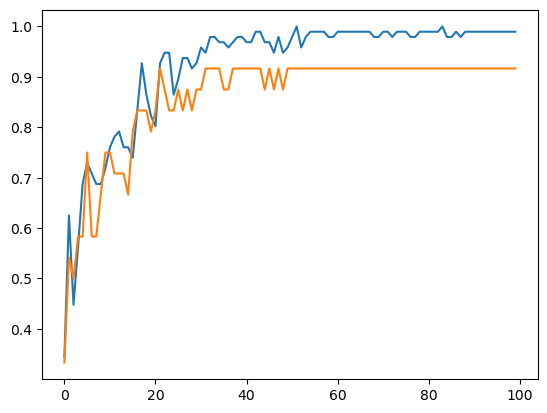

In [107]:
#Dogruluk ile ilgili grafik
plt.plot(history.history['acc'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_acc'], label='Doğrulama Doğruluğu')



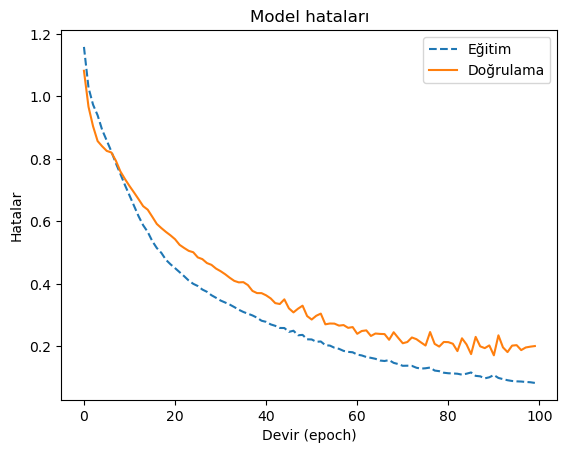

In [103]:
# Hata grafiği
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model hataları")
plt.ylabel("Hatalar
           ")
plt.xlabel("Devir (epoch)")
plt.legend(["Eğitim", "Doğrulama"], loc="upper right")
plt.show()

In [100]:
#test verisi ile performans ölçümü
scores= model.evaluate(X_test, y_test)
print("\nDoğruluk:", scores[1])


Doğruluk: 0.96666664
